# Exploration an cleanning

For this project we are using __FMA__ data set.

You can check more datailed of the origin of this here: <https://github.com/mdeff/fma>.

In [52]:
%matplotlib inline
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import sklearn as skl
import sklearn.utils
import sklearn.preprocessing
import sklearn.decomposition
import librosa
import librosa.display
import pickle 

import utils

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (17, 6)
plt.rcParams["legend.borderpad"] = 1
plt.rcParams["legend.facecolor"] = "white"
pallete_colors = cm.get_cmap('Set3', 16)
# Defining general subset size
subset_size = "large"

# Data

## Orgin file

This file is used as main repository, this is used as index to consult API's and build the metada sets.

In [2]:
# Reading the source origin of data
tracks_raw = pd.read_csv('../data/fma_metadata/raw_tracks.csv', index_col=0)
tracks_raw.head(10)

album_id           album_title  \
track_id                                   
2              1.0  AWOL - A Way Of Life   
3              1.0  AWOL - A Way Of Life   
5              1.0  AWOL - A Way Of Life   
10             6.0     Constant Hitmaker   
20             4.0                 Niris   
26             4.0                 Niris   
30             4.0                 Niris   
46             4.0                 Niris   
48             4.0                 Niris   
134            1.0  AWOL - A Way Of Life   

                                                  album_url  artist_id  \
track_id                                                                 
2         http://freemusicarchive.org/music/AWOL/AWOL_-_...          1   
3         http://freemusicarchive.org/music/AWOL/AWOL_-_...          1   
5         http://freemusicarchive.org/music/AWOL/AWOL_-_...          1   
10        http://freemusicarchive.org/music/Kurt_Vile/Co...          6   
20        http://freemusicarchive.org/music/Chris_and_Ni...          4   
26        http://freemusicarchive.org/music/Chris_and_Ni...          4   
30        http://freemusicarchive.org/music/Chris_and_Ni...          4   
46        http://freemusicarchive.org/music/Chris_and_Ni...          4   
48        http://freemusicarchive.org/music/Chris_and_Ni...          4   
134       http://freemusicarchive.org/music/AWOL/AWOL_-_...          1   

         artist_name                                         artist_url  \
track_id                                                                  
2               AWOL            http://freemusicarchive.org/music/AWOL/   
3               AWOL            http://freemusicarchive.org/music/AWOL/   
5               AWOL            http://freemusicarchive.org/music/AWOL/   
10         Kurt Vile       http://freemusicarchive.org/music/Kurt_Vile/   
20        Nicky Cook  http://freemusicarchive.org/music/Chris_and_Ni...   
26        Nicky Cook  http://freemusicarchive.org/music/Chris_and_Ni...   
30        Nicky Cook  http://freemusicarchive.org/music/Chris_and_Ni...   
46        Nicky Cook  http://freemusicarchive.org/music/Chris_and_Ni...   
48        Nicky Cook  http://freemusicarchive.org/music/Chris_and_Ni...   
134             AWOL            http://freemusicarchive.org/music/AWOL/   

                                   artist_website  \
track_id                                            
2         http://www.AzillionRecords.blogspot.com   
3         http://www.AzillionRecords.blogspot.com   
5         http://www.AzillionRecords.blogspot.com   
10                            http://kurtvile.com   
20                                            NaN   
26                                            NaN   
30                                            NaN   
46                                            NaN   
48                                            NaN   
134       http://www.AzillionRecords.blogspot.com   

                                         license_image_file  \
track_id                                                      
2         http://i.creativecommons.org/l/by-nc-sa/3.0/us...   
3         http://i.creativecommons.org/l/by-nc-sa/3.0/us...   
5         http://i.creativecommons.org/l/by-nc-sa/3.0/us...   
10        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
20        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
26        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
30        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
46        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
48        http://i.creativecommons.org/l/by-nc-nd/3.0/88...   
134       http://i.creativecommons.org/l/by-nc-sa/3.0/us...   

                                   license_image_file_large  \
track_id                                                      
2         http://fma-files.s3.amazonaws.com/resources/im...   
3         http://fma-files.s3.amazonaws.com/resources/im...   
5         http://fma-files.s3.amazonaws.com/r

## Metadata

Those files are the result of pre-processing, more details in `creation.py` file.

Metadata is stored in CSV files in the `fma_metadata.zip` archive, is composed of many files:

1. `genres.csv`
2. `tracks.csv`
3. `features.csv`

In [3]:
# Directory where mp3 are stored.
AUDIO_DIR = os.environ.get('AUDIO_DIR',
                           'C:\\Users\\lrubio\\Desktop\\TFM\\tfm-mir\\data\\fma_small')

# Load metadata and features, we are using util.py from FMA code
#tracks = utils.load('../data/fma_metadata/tracks.csv')
#genres = utils.load('../data/fma_metadata/genres.csv')
features = utils.load('../data/fma_metadata/features.csv')


file_tracks =  open('../data/fma_metadata/tracks.pkl', 'rb') 
tracks = pickle.load(file_tracks)
file_features =  open('../data/fma_metadata/features.pkl', 'rb') 
features = pickle.load(file_features)

In [4]:
# Do we have the same number of songs from tracks and features
np.testing.assert_array_equal(features.index, tracks.index)

print(f"Tracks: {tracks.shape}",
    f"Genres: {genres.shape}",
    f"Features: {features.shape}")

Tracks: (106574, 52) Genres: (163, 4) Features: (106574, 518)


## 1 Genres

The genre hierarchy is stored in `genres.csv` and distributed in `fma_metadata.zip`.

In [318]:
print(f"We have {len(genres['top_level'].unique())} top level genres.")

# Printing by number descendently by number fo songs
genres.loc[genres['top_level'].unique()].sort_values('#tracks',
                                                     ascending=False)

We have 16 top level genres.


#tracks  parent                title  top_level
genre_id                                                 
38          38154       0         Experimental         38
15          34413       0           Electronic         15
12          32923       0                 Rock         12
1235        14938       0         Instrumental       1235
10          13845       0                  Pop         10
17          12706       0                 Folk         17
21           8389       0              Hip-Hop         21
2            5271       0        International          2
4            4126       0                 Jazz          4
5            4106       0            Classical          5
9            1987       0              Country          9
20           1876       0               Spoken         20
3            1752       0                Blues          3
14           1499       0             Soul-RnB         14
8             868       0  Old-Time / Historic          8
13            730       0       Easy Listening         13

In [319]:
genres.sort_values('#tracks').head(10)

#tracks  parent                     title  top_level
genre_id                                                      
175             0      86                 Bollywood          2
178             0       4                    Be-Bop          4
377             1      19                 Deep Funk         14
173             4      86     N. Indian Traditional          2
493             4     651             Western Swing          9
374             9      20                    Banter         20
808            12      46                     Salsa          2
174            17      86  South Indian Traditional          2
465            18      20           Musical Theater         20
176            23       2                   Pacific          2

##  2 Tracks

The track metadata is stored in `tracks.csv` and distributed in `fma_metadata.zip`.

In [281]:
ipd.display(tracks['track'].head())
ipd.display(tracks['album'].head())
ipd.display(tracks['artist'].head())
ipd.display(tracks['set'].head())

bit_rate  comments   composer        date_created date_recorded  \
track_id                                                                    
2           256000         0        NaN 2008-11-26 01:48:12    2008-11-26   
3           256000         0        NaN 2008-11-26 01:48:14    2008-11-26   
5           256000         0        NaN 2008-11-26 01:48:20    2008-11-26   
10          192000         0  Kurt Vile 2008-11-25 17:49:06    2008-11-26   
20          256000         0        NaN 2008-11-26 01:48:56    2008-01-01   

          duration  favorites genre_top     genres         genres_all  \
track_id                                                                
2              168          2   Hip-Hop       [21]               [21]   
3              237          1   Hip-Hop       [21]               [21]   
5              206          6   Hip-Hop       [21]               [21]   
10             161        178       Pop       [10]               [10]   
20             311          0       Pop  [76, 103]  [17, 10, 76, 103]   

         information  interest language_code  \
track_id                                       
2                NaN      4656            en   
3                NaN      1470            en   
5                NaN      1933            en   
10               NaN     54881            en   
20               NaN       978            en   

                                                    license  listens lyricist  \
track_id                                                                        
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...     1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...      514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...     1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...    50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...      361      NaN   

          number publisher tags            title  
track_id                                          
2              3       NaN   []             Food  
3              4       NaN   []     Electric Ave  
5              6       NaN   []       This World  
10             1       NaN   []          Freeway  
20             3       NaN   []  Spiritual Level

comments        date_created date_released engineer  favorites  id  \
track_id                                                                       
2                0 2008-11-26 01:44:45    2009-01-05      NaN          4   1   
3                0 2008-11-26 01:44:45    2009-01-05      NaN          4   1   
5                0 2008-11-26 01:44:45    2009-01-05      NaN          4   1   
10               0 2008-11-26 01:45:08    2008-02-06      NaN          4   6   
20               0 2008-11-26 01:45:05    2009-01-06      NaN          2   4   

                                        information  listens producer tags  \
track_id                                                                     
2                                           <p></p>     6073      NaN   []   
3                                           <p></p>     6073      NaN   []   
5                                           <p></p>     6073      NaN   []   
10                                              NaN    47632      NaN   []   
20        <p> "spiritual songs" from Nicky Cook</p>     2710      NaN   []   

                         title  tracks   type  
track_id                                       
2         AWOL - A Way Of Life       7  Album  
3         AWOL - A Way Of Life       7  Album  
5         AWOL - A Way Of Life       7  Album  
10           Constant Hitmaker       2  Album  
20                       Niris      13  Album

active_year_begin active_year_end  \
track_id                                     
2               2006-01-01             NaT   
3               2006-01-01             NaT   
5               2006-01-01             NaT   
10                     NaT             NaT   
20              1990-01-01      2011-01-01   

                                          associated_labels  \
track_id                                                      
2                                                       NaN   
3                                                       NaN   
5                                                       NaN   
10        Mexican Summer, Richie Records, Woodsist, Skul...   
20                                                      NaN   

                                                        bio  comments  \
track_id                                                                
2         <p>A Way Of Life, A Collective of Hip-Hop from...         0   
3         <p>A Way Of Life, A Collective of Hip-Hop from...         0   
5         <p>A Way Of Life, A Collective of Hip-Hop from...         0   
10        <p><span style="font-family:Verdana, Geneva, A...         3   
20        <p>Songs written by: Nicky Cook</p>\n<p>VOCALS...         2   

                date_created  favorites  id   latitude            location  \
track_id                                                                     
2        2008-11-26 01:42:32          9   1  40.058324          New Jersey   
3        2008-11-26 01:42:32          9   1  40.058324          New Jersey   
5        2008-11-26 01:42:32          9   1  40.058324          New Jersey   
10       2008-11-26 01:42:55         74   6        NaN                 NaN   
20       2008-11-26 01:42:52         10   4  51.895927  Colchester England   

          longitude                                            members  \
track_id                                                                 
2        -74.405661  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
3        -74.405661  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
5        -74.405661  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
10              NaN                           Kurt Vile, the Violators   
20         0.891874                                       Nicky Cook\n   

                name                                   related_projects  \
track_id                                                                  
2               AWOL  The list of past projects is 2 long but every1...   
3               AWOL  The list of past projects is 2 long but every1...   
5               AWOL  The list of past projects is 2 long but every1...   
10         Kurt Vile                                                NaN   
20        Nicky Cook                                                NaN   

                                                       tags  \
track_id                                                      
2                                                    [awol]   
3                                                    [awol]   
5                                                    [awol]   
10                                      [philly, kurt vile]   
20        [instrumentals, experimental pop, post punk, e...   

                                          website wikipedia_page  
track_id                                                          
2         http://www.AzillionRecords.blogspot.com            NaN  
3         http://www.AzillionRecords.blogspot.com            NaN  
5         http://www.AzillionRecords.blogspot.com            NaN  
10                            http://kurtvile.com            NaN  
20                                            NaN            NaN

split  subset
track_id                  
2         training   small
3         training  medium
5         training   small
10        training   small
20        training   large

###  Missing values and cleanning

In [58]:
from IPython.display import HTML, display

nan_tracks = round(tracks.isnull().sum() /  tracks.isnull().count() * 100, 2)
ipd.display(pd.DataFrame(nan_tracks[nan_tracks > 0], columns=["% NAN"]))

print(f"NAN's in features file: {features.isnull().sum().sum()}")
print(f"NAN's in genres file: {genres.isnull().sum().sum()}")

% NAN
album  date_created        3.311
       date_released      34.042
       engineer           85.648
       information        21.980
       producer           83.054
       title               0.962
       type                6.107
artist active_year_begin  78.690
       active_year_end    94.957
       associated_labels  86.609
       bio                33.233
       date_created        0.803
       latitude           58.204
       location           34.121
       longitude          58.204
       members            56.041
       related_projects   87.659
       website            25.633
       wikipedia_page     94.763
track  composer           96.556
       date_recorded      94.221
       genre_top          53.461
       information        97.796
       language_code      85.903
       license             0.082
       lyricist           99.708
       publisher          98.815
       title               0.001

NAN's in features file: 0
NAN's in genres file: 0


In order to apply our prediction in genre, we'll do a deep check: 

In [291]:
genres_empy = tracks["track", "genres"][tracks["track", "genres"].str.len()
                                        == 0]
allgenres_empy = tracks["track", "genres"][tracks["track", "genres"].str.len()
                                           == 0]

# Bouth are empty, we can no do more for these songs
print (f"Number of empty values in bouth: {(genres_empy.index == allgenres_empy.index).sum()}")

# We take out those songs
features = features.drop(list(genres_empy.index))
tracks = tracks.drop(list(genres_empy.index))

Number of empty values in bouth: 2231


For those who has genre, we'll take all genres chaecking top parents, the top parent more repeated will be used as final genre_top.

If there is equal genres, we'll use the last one found it.

In [316]:
empty_genretop = tracks["track", "genre_top"].isnull()
empty_genretop

# Recursive function to get parent
def find_topparent(genre):
    gr = genres.loc[genre]
    if genre != gr['top_level']:
        return find_topparent(gr['parent'])
    else:
        return gr['title']

# For all genres take the maximun        
def finding_genretop(row): 
    gen_r = row["track","genres_all"]
    parents = []
    for g in (gen_r):
        parents.append(find_topparent(g))
    row["track", "genre_top"] = max(set(parents), key=parents.count)
    return row

# Replace the missing values
replaced_genre = tracks[empty_genretop].apply(axis=1, func=finding_genretop) 
tracks[empty_genretop] = replaced_genre

In [317]:
# Check list on unique genres
print(f"We have {len(tracks['track','genre_top'].unique())} unique genres.")

We have 16 unique genres.


## 4 Features

Features extracted with __librosa__ library, from the audio of all tracks.

Features are stored in `features.csv` and distributed in `fma_metadata.zip`.

In [320]:
print('{1} features for {0} tracks'.format(*features.shape))
columns = ['mfcc', 'chroma_cens', 'tonnetz', 'spectral_contrast']
columns.append(['spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff'])
columns.append(['rmse', 'zcr'])
for column in columns:
    ipd.display(features[column].head().style.format('{:.2f}'))

518 features for 104343 tracks


## Audio and Librosa

You can load the waveform and listen to audio and plot in the notebook itself.

In [4]:
import random

# We are using small dataset to ensure you have at least this dataset mp3 files
song_id = random.choice(tracks[tracks["set", "subset"] <= "small"].index)
filename = utils.get_audio_path(AUDIO_DIR, song_id)

x, sr = librosa.load(filename, sr=None, mono=True)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

ipd.Audio(data=x, rate=sr)

Duration: 29.98s, 1321967 samples


### RMSE Energy

Associeated with __loudness__.

In [39]:
hop_length = 256
frame_length = 512
rmse = librosa.feature.rmse(x, frame_length=frame_length, hop_length=hop_length, center=True)

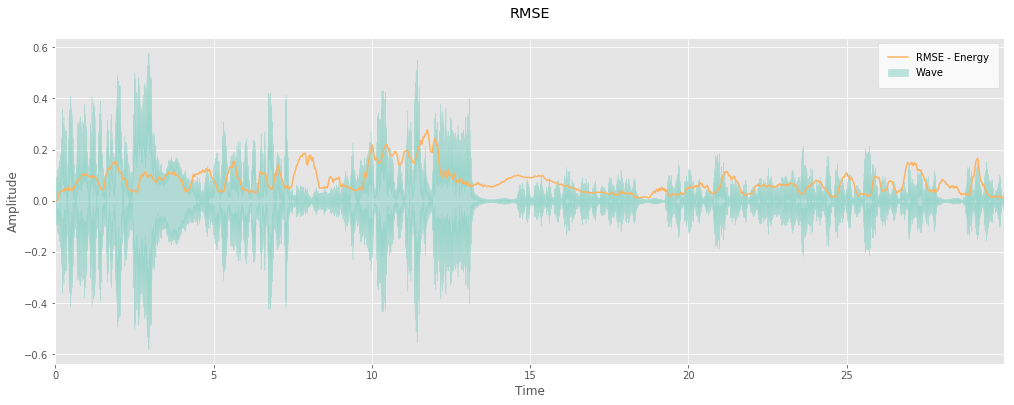

In [247]:
frames = range(rmse.shape[1])
t = librosa.frames_to_time(frames)

plt.title("RMSE", pad=20)
librosa.display.waveplot(x, sr=sr, alpha=0.6, label="Wave",
                         color=pallete_colors(1))
plt.plot(t, np.squeeze(rmse), color=pallete_colors(7),
         label="RMSE - Energy")
plt.ylabel("Amplitude")
plt.legend(loc='best');
plt.savefig('graphs/features/rmse.png')

### Zero Crossing Rate
Numer of times a singal crosses the 0 axis time, give information about __pitch__ detection.

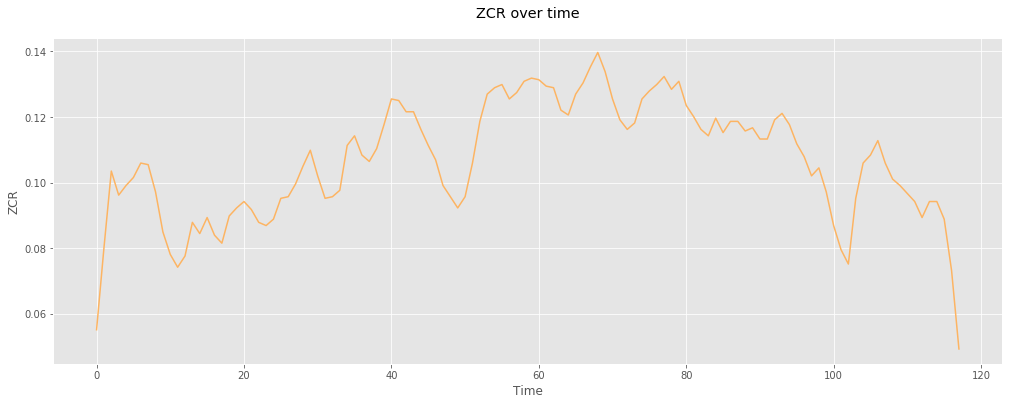

In [248]:
zero_crossings = librosa.feature.zero_crossing_rate(x[10*1000:70*1000], pad=False)
#Number of times crossing
plt.title("ZCR over time", pad=20)
plt.ylabel("ZCR")
plt.xlabel("Time")
plt.plot(zero_crossings[0], color=pallete_colors(7));
plt.savefig('graphs/features/zcr.png')

## Mel Spectogram 

Transformation of signal from time domain to frequency domain, using human hearing scale on db.

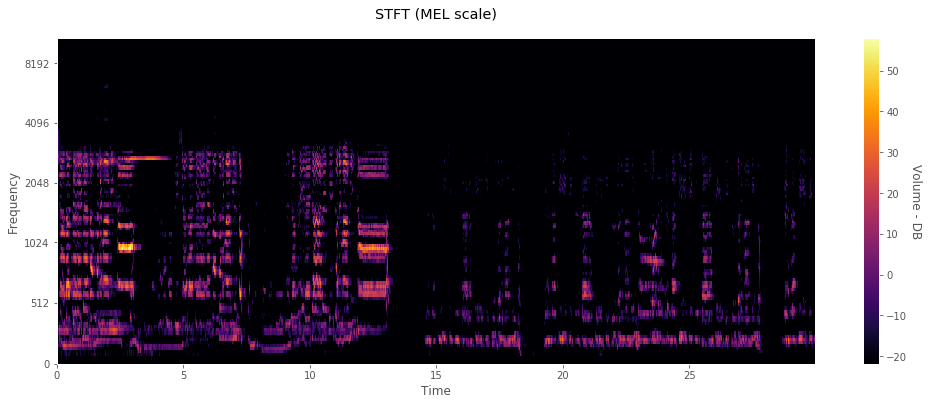

In [260]:
# Short Time Fourier Transform
stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=128))
# Mel spectrogram
mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
# logaritmic
log_mel = librosa.amplitude_to_db(mel)

librosa.display.specshow(log_mel, sr=sr, hop_length=128,
                         x_axis='time', y_axis='mel', cmap='inferno')
plt.title("STFT (MEL scale)", pad=20)
plt.ylabel("Frequency")
cb = plt.colorbar()
cb.set_label('Volume - DB', rotation=270, labelpad=15);
plt.savefig('graphs/features/mel-stft.png')

### Mel Frequency Cepstral Coefficients (MFCCs)

The are a small set of features (usually about 10 to 20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.

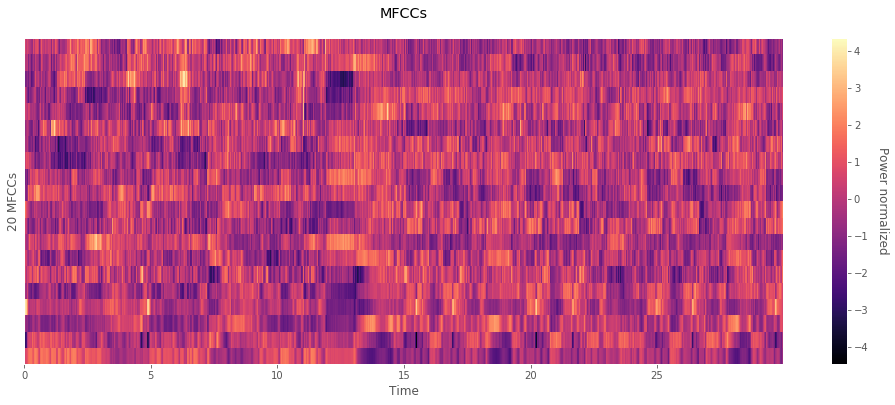

In [250]:
mfccs = librosa.feature.mfcc(x, sr=sr, n_mfcc=20)
# Normalization
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap="magma")
plt.title("MFCCs", pad=20)
plt.ylabel("20 MFCCs")
cb = plt.colorbar()
cb.set_label('Power normalized', rotation=270, labelpad=20);
plt.savefig('graphs/features/mfcc.png')

### Chroma Cens

Short Time Fourier Transform represented by equal temperament 12 pitches.

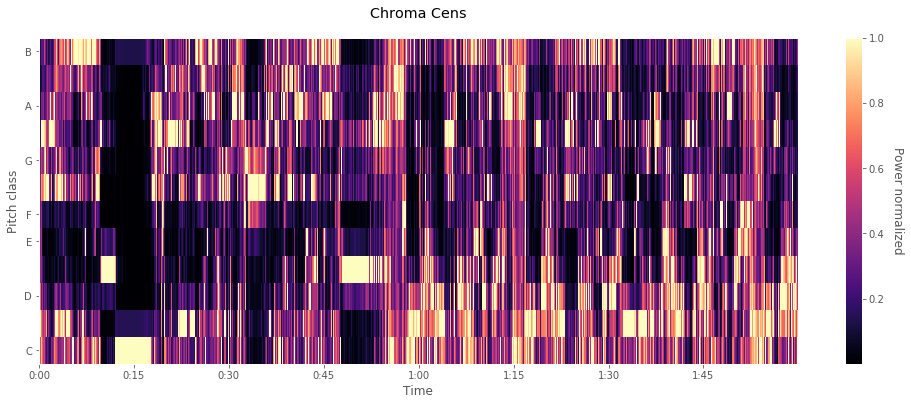

In [252]:
# Short Time Fourier Transform
stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=128))

f = librosa.feature.chroma_stft(S=stft**2, n_chroma=12)
librosa.display.specshow(f, x_axis='time', y_axis='chroma',
                         hop_length=hop_length, cmap='magma')
plt.title("Chroma Cens", pad=20)
cb = plt.colorbar()
cb.set_label('Power normalized', rotation=270, labelpad=20);
plt.savefig('graphs/features/chroma-cens.png')

### Tonnetz

Used for chord recognition.

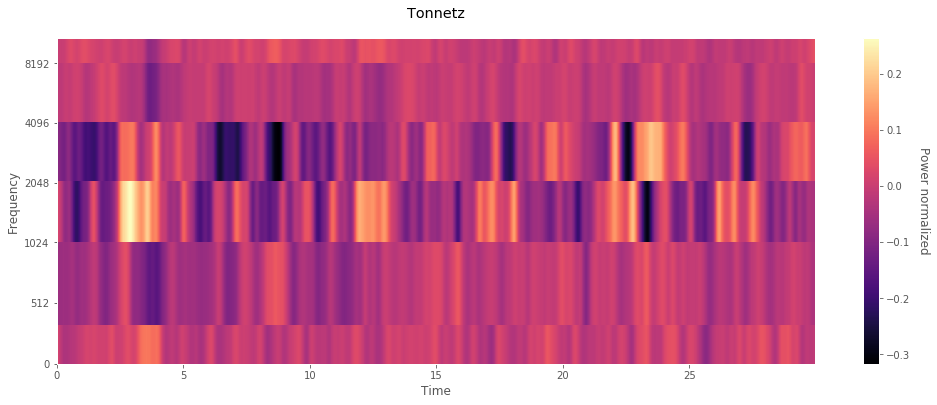

In [253]:
# Constant-Q transform
cqt = np.abs(librosa.cqt(x, sr=sr, hop_length=512, bins_per_octave=12,
                         n_bins=7*12, tuning=None))
# Chroma cens
f = librosa.feature.chroma_cens(C=cqt, n_chroma=12, n_octaves=7)

# Tonnetz
f = librosa.feature.tonnetz(chroma=f)
librosa.display.specshow(f, x_axis='time', y_axis='mel',
                         hop_length=hop_length, cmap='magma')
plt.title("Tonnetz", pad=20)
plt.ylabel("Frequency")
cb = plt.colorbar()
cb.set_label('Power normalized', rotation=270, labelpad=20);
plt.savefig('graphs/features/tonnetz.png')

### Spectral Contrast

Spectral contrast considers the spectral peak, the spectral valley, and their difference in each frequency subband.


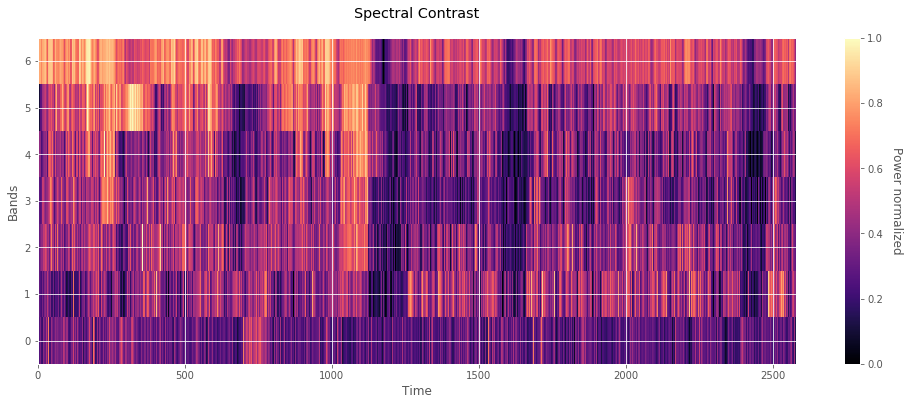

In [254]:
# Clculated for 6 bands
spectral_contrast = librosa.feature.spectral_contrast(x, sr=sr, n_bands=6)
plt.imshow(normalize(spectral_contrast, axis=1),
           aspect='auto', origin='lower', cmap='magma')
plt.title("Spectral Contrast", pad=20)
plt.ylabel("Bands")
plt.xlabel("Time")
cb = plt.colorbar()
cb.set_label('Power normalized', rotation=270, labelpad=20);
plt.savefig('graphs/features/spectral-constrast.png')

###  Spectral Centroid

The spectral centroid indicates at which frequency the energy of a spectrum is centered upon. This is like a weighted mean. 
Computes the spectral centroid for each frame in a signal.

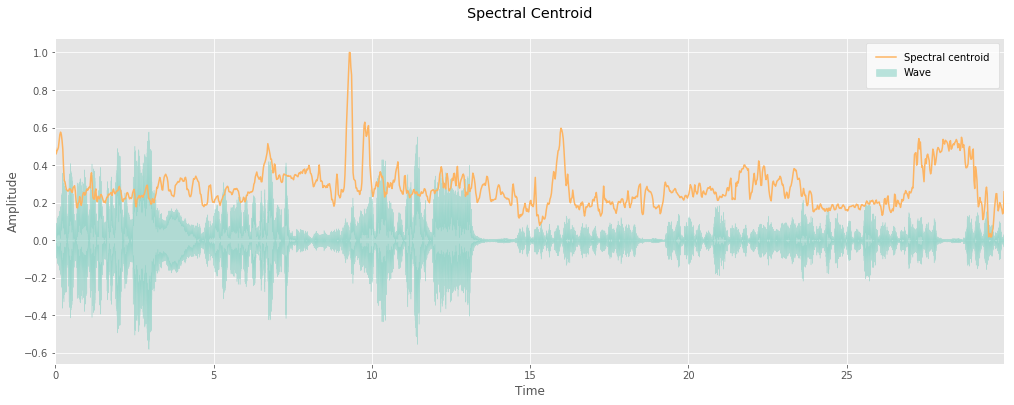

In [255]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
plt.title("Spectral Centroid", pad=20)
librosa.display.waveplot(x, sr=sr, alpha=0.6, label="Wave",
                         color=pallete_colors(1))
plt.plot(t, normalize(spectral_centroids), color=pallete_colors(7),
         label="Spectral centroid")
plt.ylabel("Amplitude")
plt.legend(loc='best');
plt.savefig('graphs/features/spectral-centroid.png')

### Spectral Bandwidth

Computes the order-p spectral bandwidth.

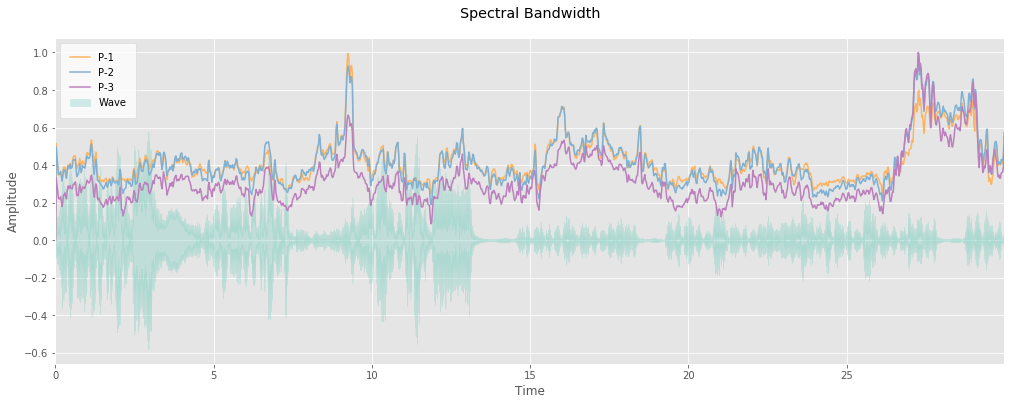

In [256]:
spectral_bandwidth_1 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=1)[0]
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=2)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]

librosa.display.waveplot(x, sr=sr, alpha=0.4,
                         color=pallete_colors(1), label="Wave")
plt.plot(t, normalize(spectral_bandwidth_1),
         color=pallete_colors(7), label="P-1")
plt.plot(t, normalize(spectral_bandwidth_2),
         color=pallete_colors(5), label="P-2")
plt.plot(t, normalize(spectral_bandwidth_3),
         color=pallete_colors(12), label="P-3")
plt.ylabel('Amplitude')
plt.title("Spectral Bandwidth", pad=20)
plt.legend(loc='best');
plt.savefig('graphs/features/spectral-bandwidth.png')

### Spectral Rolloff

Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

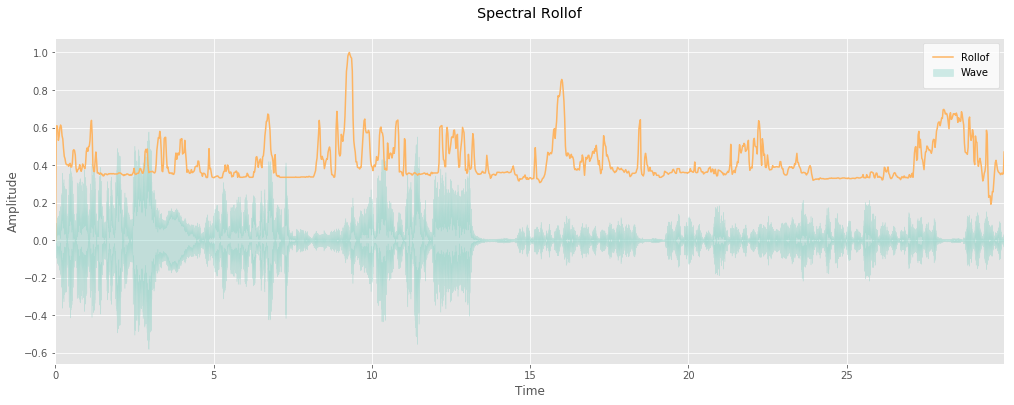

In [257]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4,
                         color=pallete_colors(1), label="Wave")
plt.plot(t, normalize(spectral_rolloff),
         color=pallete_colors(7), label="Rollof")
plt.ylabel('Amplitude')
plt.title("Spectral Rollof", pad=20)
plt.legend(loc='best');
plt.savefig('graphs/features/spectral-rolloff.png')

## Saving data

Now that we know how is composed our data and we cleaned the missing values of genre, well save our data to re-used in next  notebooks.

In [326]:
import pickle 

file_tracks = open('../data/fma_metadata/tracks.pkl', 'wb') 
pickle.dump(tracks, file_tracks)

file_features = open('../data/fma_metadata/features.pkl', 'wb') 
pickle.dump(features, file_features)